# Code Appendix
Note: Some of the code has been re-used from my previous CS156 Assignments that required similar methods (e.g. Logistic Regression, SVM, etc.) with only the inputted data and function parameters changed.
## Import Data

In [1]:
from glob import glob
import os
import shutil
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [155]:
# import all images
file = glob('cat_imgs/*')
print(f'Cat Breeds = {len(file)}')

Cat Breeds = 67


Total Images = 126607


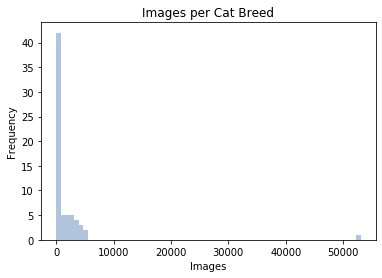

In [156]:
# count images per folder
img_counts = []
for folder in file: 
    img_count = len(os.listdir(folder))
    img_counts.append(img_count)
print(f'Total Images = {sum(img_counts)}')    

# plot distribution of image counts
plt.figure(figsize=(6,4))
plt.hist(img_counts, bins=67, color='lightsteelblue')
plt.title('Images per Cat Breed')
plt.xlabel('Images')
plt.ylabel('Frequency')
plt.show()

In [157]:
# refine samples
new_file = []
remove = []
for folder in file: 
    img_count = len(os.listdir(folder))
    # remove folders with under 1000 images (too few)
    # remove folders with over 5000 images (too many)
    if img_count > 1000 and img_count < 5000:
        new_file.append(folder)
    else:
        remove.append(folder)
print(f'Remaining Cat Breeds = {len(new_file)}')

Remaining Cat Breeds = 20


Total Images = 53501


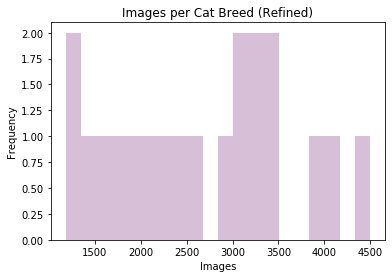

In [158]:
# count images per folder
new_img_counts = []
for folder in new_file: 
    img_count = len(os.listdir(folder))
    new_img_counts.append(img_count)
print(f'Total Images = {sum(new_img_counts)}')

# plot distribution of image counts
plt.figure(figsize=(6,4))
plt.hist(new_img_counts, bins=20, color='thistle')
plt.title('Images per Cat Breed (Refined)')
plt.xlabel('Images')
plt.ylabel('Frequency')
plt.show()

In [159]:
# remove folders of breeds we are not using
for i in remove:
    i = str(i)
    shutil.rmtree(i)

final_file = glob('cat_imgs/*')
print(f'Cat Breeds = {len(final_file)}')

Cat Breeds = 20


In [2]:
# use this cell to quickly load processed data
final_file = glob('cat_imgs/*')
print(f'Cat Breeds = {len(final_file)}')

Cat Breeds = 20


## Process Images

In [26]:
# resize and crop images

def resize_images(images):
    '''
    Resizes and crops images using the function given
    in the Session 7 repo from load_images.py.
    '''    

    flattened = []
    # for each image path
    for path in images:
        # open it as a read file in binary mode
        with open(path, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                cover = resizeimage.resize_cover(image, [50, 50])
                # flatten the matrix to an array and 
                # append it to all flattened images
                flattened.append((np.array(cover).flatten(), 0))    

    # Flatten it once more
    flattened = np.asarray(flattened)

    # Declare which are the X and Y inputs
    X = flattened[:,0]
    Y = flattened[:,1]

    for idx,i in enumerate(X):
        if np.array_equal(i.shape,(7500,)) == False:
            print(idx)

    # Use np.stack to put the data into the right dimension
    X = np.stack(i for i in X)
    Y = np.stack(i for i in Y)
    
    # return resized images
    return X, Y

In [27]:
# call image files
breeds_files = []
for i in final_file:
    path = str(i+'/*')
    breeds_files.append(glob(path))

In [28]:
# process images
images = np.empty(len(breeds_files), dtype=object)
for i in range(len(breeds_files)):  
    breed_imgs = np.empty(len(breeds_files[i]), dtype=object)
    breed_imgs[i] = resize_images(breeds_files[i])[0]
    images[i] = breed_imgs[i]

/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
# add categorical variables (numerical)
breed_nums = []
for i in range(len(images)):
    num_array = np.full((1, len(images[i])), i)
    num_array = np.reshape(num_array, (len(images[i]),1))
    breed_nums.append(num_array)

In [30]:
# append breed categories to data
img_data = []
for i in range(len(images)):
    data = np.append(images[i], breed_nums[i], axis=1)
    img_data.append(data)

In [31]:
# compile samples of images into master list
img_data_list = []
for breed in img_data:
    samples = random.choices((breed),k=100)
    img_data_list.append(samples)
img_data_list = [j for i in img_data_list for j in i]

In [32]:
# convert list to array for dataframe
img_data_list = np.array(img_data_list)
img_data_list.shape

(2000, 7501)

In [33]:
# create dataframe containing all image data
df = pd.DataFrame(img_data_list)
df = df.rename(columns={df.columns[-1]: 'Breed'})
df

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Breed
0,231,211,187,233,212,193,236,215,200,212,...,40,28,18,46,32,22,49,36,23,0
1,234,192,144,233,191,143,232,191,142,231,...,129,120,114,147,136,130,154,142,137,0
2,206,205,203,206,205,202,205,204,200,204,...,209,127,109,207,96,89,207,80,80,0
3,174,172,172,171,160,157,190,194,190,191,...,47,28,32,54,35,35,85,79,67,0
4,137,121,103,137,122,105,138,124,98,137,...,159,141,127,147,130,115,136,118,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,37,22,4,36,20,8,31,16,6,33,...,107,62,18,103,60,13,106,63,18,19
1996,125,110,91,125,111,91,127,113,93,121,...,40,20,24,76,51,58,57,23,45,19
1997,255,255,255,255,255,255,254,254,254,255,...,253,253,250,255,255,254,255,255,255,19
1998,76,60,45,71,54,45,68,53,41,67,...,71,63,49,74,65,55,83,76,62,19


## Display Image Samples

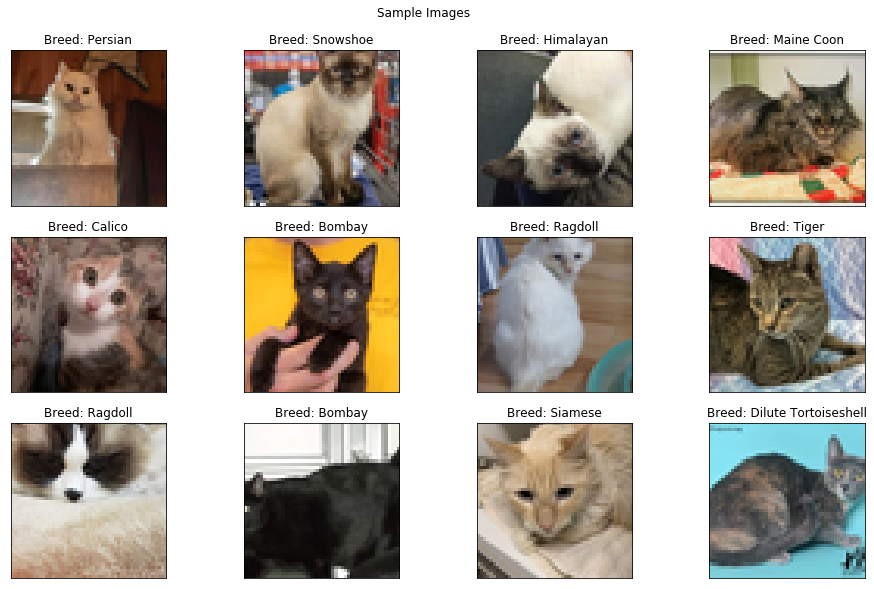

In [34]:
# choose samples of reconstructed images
reshaped = []
reshaped_breed = []
for i in range(12):
    sample = random.choice(img_data_list)
    breed = sample[-1]
    reshaped_breed.append(breed)
    
    new_img = sample[:-1]
    new_img = np.clip(new_img, 0, 255).astype(np.uint8)
    new_img = Image.fromarray(new_img.reshape(50,50,3), 'RGB')
    reshaped.append(new_img)

# plot samples
fig = plt.figure(figsize=(16, 20)) 

for i in range(12): 
    ax = fig.add_subplot(6, 4, i+1, xticks=[], yticks=[]) 
    ax.imshow(reshaped[i], interpolation='nearest')
    ax.set_title(f'Breed: {final_file[reshaped_breed[i]][9:]}')
    
plt.suptitle('Sample Images', y=0.91)

plt.show()

## Logistic Regression Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [36]:
### Define Variables ###

# use all but 'Breed' as independent variables
X = df.drop(columns='Breed')

# use 'Breed' as dependent variable
y = df['Breed']

# split into train and test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=0)

In [114]:
%%time
# create the hyperparameter grid
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 
              'solver' : ['sag', 'saga'], 
              'tol' : [0.01, 0.1, 1, 10, 100]}

# create logistic regression classifier
logregs = LogisticRegression()

# define GridSearchCV object
logreg_cv = GridSearchCV(logregs, param_grid, cv=3)

# fit GridSearchCV object to training data of 2000 samples
logreg_cv.fit(X_train, y_train)

print('Cross-Validation Complete')

Cross-Validation Complete
CPU times: user 30min 50s, sys: 29.2 s, total: 31min 19s
Wall time: 30min 49s


In [115]:
# print best parameters and best score
print(f'Tuned Log-Reg Parameters: {logreg_cv.best_params_}')
print(f'Tuned Log-Reg Accuracy: {logreg_cv.best_score_}')

Tuned Log-Reg Parameters: {'C': 10, 'solver': 'saga', 'tol': 0.1}
Tuned Log-Reg Accuracy: 0.10750750117699968


In [37]:
# create the classifier
logreg = LogisticRegression(C=10, solver='saga', tol=0.1)

# fit the classifier to the training data
logreg.fit(X_train,y_train)

# predict the labels of the test set
y_pred = logreg.predict(X_test)

In [38]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# compute and print accuracy scores and error rates
score_train_logreg = np.round(logreg.score(X_train, y_train),3)
score_test_logreg = np.round(logreg.score(X_test, y_test),3)
print(f'Accuracy Score (Train): {score_train_logreg}')
print(f'Accuracy Score (Test): {score_test_logreg}')
print(f'Error Rate (Train): {1-score_train_logreg}')
print(f'Error Rate (Test): {1-score_test_logreg}')

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.04      0.05        28
           1       0.04      0.06      0.05        18
           2       0.05      0.04      0.04        24
           3       0.13      0.17      0.15        18
           4       0.00      0.00      0.00        19
           5       0.14      0.18      0.16        22
           6       0.07      0.12      0.09        16
           7       0.10      0.14      0.12        21
           8       0.09      0.06      0.07        18
           9       0.04      0.06      0.05        16
          10       0.19      0.17      0.18        18
          11       0.07      0.14      0.10        22
          12       0.07      0.05      0.05        22
          13       0.31      0.50      0.38        22
          14       0.14      0.12      0.13        17
          15       0.00      0.00      0.00        17
          16       0.17      0.10      0.12        21
    

## Logistic Regression Model with PCA

In [39]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline

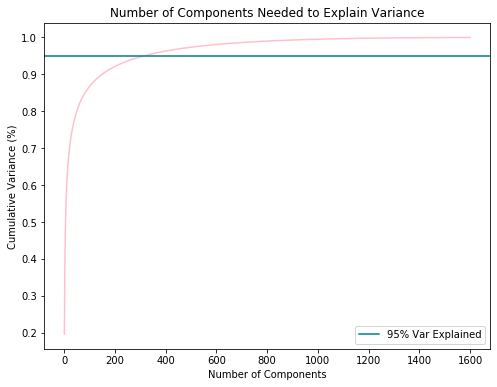

In [40]:
# apply PCA using all components
n_components = len(X_train)
pca_test = decomposition.PCA(n_components=n_components)

# fit images to PCA to reduce dimensions
transformed = pca_test.fit_transform(X_train)

# plot number of components vs. explained variance
plt.figure(figsize=(8,6))

components = np.arange(1, n_components+1, step=1)
var = np.cumsum(pca_test.explained_variance_ratio_)

plt.plot(components, var, color='pink')
plt.axhline(y=0.95, color='teal', label='95% Var Explained')

plt.title('Number of Components Needed to Explain Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')

plt.legend(loc=4)
plt.show()

In [41]:
# implement Pipeline to use PCA on a logreg classifier

# set up PCA
pca = decomposition.PCA(n_components=400)

# set up the pipeline steps
steps = [('pca', pca),
         ('logreg2', LogisticRegression(C=10, solver='saga', tol=0.1))]
        
# create the pipeline
pipeline = Pipeline(steps)

# fit a logreg classifier with PCA
logreg_pca = pipeline.fit(X_train, y_train)

# predict the labels of the test set
y_pred_pca = logreg_pca.predict(X_test)

In [42]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_pca))

# compute and print accuracy scores and error rates
score_train_pca = np.round(logreg_pca.score(X_train, y_train),3)
score_test_pca = np.round(logreg_pca.score(X_test, y_test),3)
print(f'Accuracy Score (Train): {score_train_pca}')
print(f'Accuracy Score (Test): {score_test_pca}')
print(f'Error Rate (Train): {1-score_train_pca}')
print(f'Error Rate (Test): {1-score_test_pca}')

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.04      0.05        28
           1       0.07      0.11      0.09        18
           2       0.04      0.04      0.04        24
           3       0.12      0.11      0.11        18
           4       0.17      0.05      0.08        19
           5       0.11      0.14      0.12        22
           6       0.04      0.06      0.05        16
           7       0.12      0.14      0.13        21
           8       0.00      0.00      0.00        18
           9       0.19      0.19      0.19        16
          10       0.14      0.11      0.12        18
          11       0.12      0.14      0.12        22
          12       0.03      0.05      0.04        22
          13       0.27      0.64      0.38        22
          14       0.10      0.06      0.07        17
          15       0.06      0.06      0.06        17
          16       0.14      0.10      0.11        21
    

## Logistic Regression Model with LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
# implement Pipeline to use LDA on a logreg classifier

# set up LDA
lda = LinearDiscriminantAnalysis(n_components=19)

# set up the pipeline steps
steps = [('lda', lda),
         ('logreg3', LogisticRegression(C=10, solver='saga', tol=0.1))]
        
# create the pipeline
pipeline = Pipeline(steps)

# fit a logreg classifier with LDA
logreg_lda = pipeline.fit(X_train, y_train)

# predict the labels of the test set
y_pred_lda = logreg_lda.predict(X_test)

In [45]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_lda))

# compute and print accuracy scores and error rates
score_train_lda = np.round(logreg_lda.score(X_train, y_train),3)
score_test_lda = np.round(logreg_lda.score(X_test, y_test),3)
print(f'Accuracy Score (Train): {score_train_lda}')
print(f'Accuracy Score (Test): {score_test_lda}')
print(f'Error Rate (Train): {1-score_train_lda}')
print(f'Error Rate (Test): {1-score_test_lda}')

Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.07      0.06        28
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        24
           3       0.25      0.06      0.09        18
           4       0.11      0.11      0.11        19
           5       0.06      0.05      0.05        22
           6       0.13      0.12      0.13        16
           7       0.11      0.14      0.12        21
           8       0.00      0.00      0.00        18
           9       0.11      0.06      0.08        16
          10       0.02      0.06      0.03        18
          11       0.33      0.09      0.14        22
          12       0.09      0.14      0.11        22
          13       0.07      0.05      0.06        22
          14       0.08      0.24      0.12        17
          15       1.00      0.12      0.21        17
          16       0.17      0.05      0.07        21
    

## Linear SVM Model

In [46]:
from sklearn import svm
from sklearn.metrics.pairwise import linear_kernel, \
polynomial_kernel, rbf_kernel

In [47]:
# create the classifier
svm_linear = svm.SVC(kernel='linear')

# fit the classifier to the training data
svm_linear.fit(X_train,y_train)

# predict the labels of the test set
y_pred_linear = svm_linear.predict(X_test)

In [48]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_linear))

# compute and print accuracy scores and error rates
score_train_linear = np.round(svm_linear.score(X_train, y_train),3)
score_test_linear = np.round(svm_linear.score(X_test, y_test),3)

print(f'Accuracy Score (Train): {score_train_linear}')
print(f'Accuracy Score (Test): {score_test_linear}')
print(f'Error Rate (Train): {1-score_train_linear}')
print(f'Error Rate (Test): {1-score_test_linear}')

Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.04      0.04        28
           1       0.12      0.17      0.14        18
           2       0.07      0.04      0.05        24
           3       0.08      0.11      0.09        18
           4       0.15      0.16      0.15        19
           5       0.10      0.14      0.12        22
           6       0.08      0.12      0.10        16
           7       0.18      0.19      0.19        21
           8       0.00      0.00      0.00        18
           9       0.13      0.19      0.15        16
          10       0.27      0.17      0.21        18
          11       0.11      0.14      0.12        22
          12       0.13      0.09      0.11        22
          13       0.48      0.45      0.47        22
          14       0.22      0.12      0.15        17
          15       0.05      0.06      0.05        17
          16       0.06      0.05      0.05        21
    

## Polynomial SVM Model

In [49]:
# create the classifier
svm_poly = svm.SVC(kernel='poly', degree=2)

# fit the classifier to the training data
svm_poly.fit(X_train,y_train)

# predict the labels of the test set
y_pred_poly = svm_poly.predict(X_test)

In [50]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_poly))

# compute and print accuracy scores and error rates
score_train_poly = np.round(svm_poly.score(X_train, y_train),3)
score_test_poly = np.round(svm_poly.score(X_test, y_test),3)

print(f'Accuracy Score (Train): {score_train_poly}')
print(f'Accuracy Score (Test): {score_test_poly}')
print(f'Error Rate (Train): {1-score_train_poly}')
print(f'Error Rate (Test): {1-score_test_poly}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.10      0.11      0.11        18
           2       0.00      0.00      0.00        24
           3       0.10      0.11      0.10        18
           4       0.14      0.11      0.12        19
           5       0.07      0.09      0.08        22
           6       0.08      0.12      0.10        16
           7       0.17      0.19      0.18        21
           8       0.00      0.00      0.00        18
           9       0.12      0.12      0.12        16
          10       0.11      0.11      0.11        18
          11       0.10      0.14      0.12        22
          12       0.15      0.14      0.14        22
          13       0.29      0.50      0.37        22
          14       0.09      0.06      0.07        17
          15       0.05      0.06      0.05        17
          16       0.07      0.05      0.06        21
    

## RBF SVM Model

In [51]:
# create the classifier
svm_rbf = svm.SVC(kernel='rbf')

# fit the classifier to the training data
svm_rbf.fit(X_train,y_train)

# predict the labels of the test set
y_pred_rbf = svm_rbf.predict(X_test)

In [52]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rbf))

# compute and print accuracy scores and error rates
score_train_rbf = np.round(svm_rbf.score(X_train, y_train),3)
score_test_rbf = np.round(svm_rbf.score(X_test, y_test),3)

print(f'Accuracy Score (Train): {score_train_rbf}')
print(f'Accuracy Score (Test): {score_test_rbf}')
print(f'Error Rate (Train): {1-score_train_rbf}')
print(f'Error Rate (Test): {1-score_test_rbf}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.19      0.28      0.23        18
           2       0.00      0.00      0.00        24
           3       0.12      0.11      0.12        18
           4       0.00      0.00      0.00        19
           5       0.12      0.09      0.10        22
           6       0.12      0.19      0.14        16
           7       0.14      0.29      0.19        21
           8       0.00      0.00      0.00        18
           9       0.18      0.19      0.18        16
          10       0.15      0.11      0.13        18
          11       0.08      0.14      0.10        22
          12       0.13      0.09      0.11        22
          13       0.28      0.64      0.39        22
          14       0.10      0.18      0.13        17
          15       0.15      0.24      0.18        17
          16       0.09      0.10      0.09        21
    

## VGG16 Neural Network Model

In [83]:
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [4]:
# split data into 80% training, 20% validating data
img_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# use path containing folders for 20 cat breeds
path = 'cat_imgs'
train = img_data.flow_from_directory(path, class_mode="categorical", 
                                    target_size=(100,100), 
                                    subset="training")
test = img_data.flow_from_directory(path, class_mode="categorical", 
                                   target_size=(100,100), 
                                   subset="validation")

Found 42770 images belonging to 20 classes.
Found 10682 images belonging to 20 classes.


In [5]:
# define VGG16 model
VGG16_model = VGG16(include_top=False, weights='imagenet', 
                    input_shape=(100,100,3))
VGG16_model.trainable = False
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [6]:
# add prediciton dense layer with softmax activation function
flattened_layers = layers.Flatten()
prediction_layer = layers.Dense(len(final_file), 
                                activation='softmax')

# define final model
model = models.Sequential([VGG16_model, 
                           flattened_layers, prediction_layer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 14,806,868
Trainable params: 92,180
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
# compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [9]:
# fit model
history = model.fit(train, validation_data=test, 
                    epochs=10, steps_per_epoch=100, batch_size=100)

Epoch 1/10
100/100 [==============================] - 344s 3s/step - loss: 2.4814 - accuracy: 0.2309 - val_loss: 2.5486 - val_accuracy: 0.2281
Epoch 2/10
100/100 [==============================] - 346s 3s/step - loss: 2.4461 - accuracy: 0.2461 - val_loss: 2.5159 - val_accuracy: 0.2235
Epoch 3/10
100/100 [==============================] - 347s 3s/step - loss: 2.4024 - accuracy: 0.2618 - val_loss: 2.4938 - val_accuracy: 0.2341
Epoch 4/10
100/100 [==============================] - 342s 3s/step - loss: 2.3733 - accuracy: 0.2822 - val_loss: 2.5572 - val_accuracy: 0.2377
Epoch 5/10
100/100 [==============================] - 342s 3s/step - loss: 2.3448 - accuracy: 0.2803 - val_loss: 2.5187 - val_accuracy: 0.2565
Epoch 6/10
100/100 [==============================] - 341s 3s/step - loss: 2.3153 - accuracy: 0.2988 - val_loss: 2.4760 - val_accuracy: 0.2450
Epoch 7/10
100/100 [==============================] - 340s 3s/step - loss: 2.2938 - accuracy: 0.3041 - val_loss: 2.4595 - val_accuracy: 0.2506

In [10]:
# compute and print accuracy scores and error rates
score_train_VGG16 = np.round(history.history['accuracy'][-1],3)
score_test_VGG16 = np.round(history.history['val_accuracy'][-1],3)

print(f'Accuracy Score (Train): {score_train_VGG16}')
print(f'Accuracy Score (Test): {score_test_VGG16}')
print(f'Error Rate (Train): {1-score_train_VGG16}')
print(f'Error Rate (Test): {1-score_test_VGG16}')

Accuracy Score (Train): 0.314
Accuracy Score (Test): 0.239
Error Rate (Train): 0.6859999999999999
Error Rate (Test): 0.761


## Inception Neural Network Model

In [62]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [63]:
# split data into 80% training, 20% validating data
img_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# use path containing folders for 20 cat breeds
path = 'cat_imgs'
train = img_data.flow_from_directory(path, class_mode="categorical", 
                                    target_size=(244,244), 
                                    subset="training")
test = img_data.flow_from_directory(path, class_mode="categorical", 
                                   target_size=(244,244), 
                                   subset="validation")

Found 42770 images belonging to 20 classes.
Found 10682 images belonging to 20 classes.


In [64]:
# define Inception model
Inception_model = InceptionV3(include_top=False, weights='imagenet', 
                    input_shape=(244,244,3))
Inception_model.trainable = False
Inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 121, 121, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 121, 121, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [65]:
# add prediciton dense layer with softmax activation function
flattened_layers = layers.Flatten()
prediction_layer = layers.Dense(len(final_file), 
                                activation='softmax')

# define final model
model_2 = models.Sequential([Inception_model, 
                             flattened_layers, prediction_layer])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 73728)             0         
                                                                 
 dense_4 (Dense)             (None, 20)                1474580   
                                                                 
Total params: 23,277,364
Trainable params: 1,474,580
Non-trainable params: 21,802,784
_________________________________________________________________


In [66]:
# compile model
model_2.compile(optimizer="adam", loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [67]:
# fit model
history_2 = model_2.fit(train, validation_data=test, 
                    epochs=10, steps_per_epoch=100, batch_size=100)

Epoch 1/10
100/100 [==============================] - 445s 4s/step - loss: 18.6831 - accuracy: 0.2594 - val_loss: 14.5795 - val_accuracy: 0.3077
Epoch 2/10
100/100 [==============================] - 437s 4s/step - loss: 12.3151 - accuracy: 0.3319 - val_loss: 16.6988 - val_accuracy: 0.2777
Epoch 3/10
100/100 [==============================] - 437s 4s/step - loss: 12.1769 - accuracy: 0.3697 - val_loss: 13.8425 - val_accuracy: 0.3178
Epoch 4/10
100/100 [==============================] - 437s 4s/step - loss: 13.0752 - accuracy: 0.3703 - val_loss: 16.0342 - val_accuracy: 0.3406
Epoch 5/10
100/100 [==============================] - 439s 4s/step - loss: 12.6327 - accuracy: 0.4103 - val_loss: 16.5545 - val_accuracy: 0.3640
Epoch 6/10
100/100 [==============================] - 444s 4s/step - loss: 12.0087 - accuracy: 0.4338 - val_loss: 14.1239 - val_accuracy: 0.3512
Epoch 7/10
100/100 [==============================] - 452s 5s/step - loss: 11.9390 - accuracy: 0.4573 - val_loss: 16.8688 - val_ac

In [68]:
# compute and print accuracy scores and error rates
score_train_Inception = np.round(history_2.history['accuracy'][-1],3)
score_test_Inception = np.round(history_2.history['val_accuracy'][-1],3)

print(f'Accuracy Score (Train): {score_train_Inception}')
print(f'Accuracy Score (Test): {score_test_Inception}')
print(f'Error Rate (Train): {1-score_train_Inception}')
print(f'Error Rate (Test): {1-score_test_Inception}')

Accuracy Score (Train): 0.473
Accuracy Score (Test): 0.338
Error Rate (Train): 0.527
Error Rate (Test): 0.6619999999999999


## ResNet50 Neural Network Model

In [11]:
from tensorflow.keras.applications import ResNet50

In [12]:
# split data into 80% training, 20% validating data
img_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# use path containing folders for 20 cat breeds
path = 'cat_imgs'
train = img_data.flow_from_directory(path, class_mode="categorical", 
                                    target_size=(244,244), 
                                    subset="training")
test = img_data.flow_from_directory(path, class_mode="categorical", 
                                   target_size=(244,244), 
                                   subset="validation")

Found 42770 images belonging to 20 classes.
Found 10682 images belonging to 20 classes.


In [13]:
# define ResNet50 model
ResNet50_model = ResNet50(include_top=False, weights='imagenet', 
                    input_shape=(244,244,3))
ResNet50_model.trainable = False
ResNet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 250, 250, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 122, 122, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [14]:
# add prediciton dense layer with softmax activation function
flattened_layers = layers.Flatten()
prediction_layer = layers.Dense(len(final_file), 
                                activation='softmax')

# define final model
model_3 = models.Sequential([ResNet50_model, 
                             flattened_layers, prediction_layer])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_1 (Dense)             (None, 20)                2621460   
                                                                 
Total params: 26,209,172
Trainable params: 2,621,460
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
# compile model
model_3.compile(optimizer="adam", loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [16]:
# fit model
history_3 = model_3.fit(train, validation_data=test, 
                    epochs=10, steps_per_epoch=100, batch_size=100)

Epoch 1/10
100/100 [==============================] - 939s 9s/step - loss: 29.4678 - accuracy: 0.0609 - val_loss: 11.7023 - val_accuracy: 0.0544
Epoch 2/10
100/100 [==============================] - 945s 10s/step - loss: 14.7167 - accuracy: 0.0600 - val_loss: 15.1006 - val_accuracy: 0.0445
Epoch 3/10
100/100 [==============================] - 952s 10s/step - loss: 13.7195 - accuracy: 0.0769 - val_loss: 13.4298 - val_accuracy: 0.0731
Epoch 4/10
100/100 [==============================] - 953s 10s/step - loss: 15.1689 - accuracy: 0.0778 - val_loss: 12.2926 - val_accuracy: 0.1075
Epoch 5/10
100/100 [==============================] - 964s 10s/step - loss: 12.6485 - accuracy: 0.0862 - val_loss: 10.8608 - val_accuracy: 0.0965
Epoch 6/10
100/100 [==============================] - 971s 10s/step - loss: 15.1159 - accuracy: 0.0834 - val_loss: 13.0099 - val_accuracy: 0.0843
Epoch 7/10
100/100 [==============================] - 974s 10s/step - loss: 13.5401 - accuracy: 0.0922 - val_loss: 16.4571 - 

In [18]:
# compute and print accuracy scores and error rates
score_train_ResNet50 = np.round(history_3.history['accuracy'][-1],3)
score_test_ResNet50 = np.round(history_3.history['val_accuracy'][-1],3)

print(f'Accuracy Score (Train): {score_train_ResNet50}')
print(f'Accuracy Score (Test): {score_test_ResNet50}')
print(f'Error Rate (Train): {1-score_train_ResNet50}')
print(f'Error Rate (Test): {1-score_test_ResNet50}')

Accuracy Score (Train): 0.095
Accuracy Score (Test): 0.088
Error Rate (Train): 0.905
Error Rate (Test): 0.912


## EfficientNet Neural Network Model

In [19]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [20]:
# split data into 80% training, 20% validating data
img_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# use path containing folders for 20 cat breeds
path = 'cat_imgs'
train = img_data.flow_from_directory(path, class_mode="categorical", 
                                    target_size=(244,244), 
                                    subset="training")
test = img_data.flow_from_directory(path, class_mode="categorical", 
                                   target_size=(244,244), 
                                   subset="validation")

Found 42770 images belonging to 20 classes.
Found 10682 images belonging to 20 classes.


In [21]:
# define EfficientNet model
EfficientNet_model = EfficientNetB0(include_top=False, weights='imagenet', 
                    input_shape=(244,244,3))
EfficientNet_model.trainable = False
EfficientNet_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 244, 244, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 244, 244, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 245, 245, 3)  0           ['normalization[0][0

In [22]:
# add prediciton dense layer with softmax activation function
flattened_layers = layers.Flatten()
prediction_layer = layers.Dense(len(final_file), 
                                activation='softmax')

# define final model
model_4 = models.Sequential([EfficientNet_model, 
                             flattened_layers, prediction_layer])
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 flatten_2 (Flatten)         (None, 81920)             0         
                                                                 
 dense_2 (Dense)             (None, 20)                1638420   
                                                                 
Total params: 5,687,991
Trainable params: 1,638,420
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
# compile model
model_4.compile(optimizer="adam", loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [24]:
# fit model
history_4 = model_4.fit(train, validation_data=test,
                       epochs=10, steps_per_epoch=100, batch_size=100)

Epoch 1/10
100/100 [==============================] - 471s 5s/step - loss: 10.6312 - accuracy: 0.0622 - val_loss: 4.4172 - val_accuracy: 0.0649
Epoch 2/10
100/100 [==============================] - 444s 4s/step - loss: 6.1859 - accuracy: 0.0599 - val_loss: 4.8665 - val_accuracy: 0.0595
Epoch 3/10
100/100 [==============================] - 434s 4s/step - loss: 6.8848 - accuracy: 0.0603 - val_loss: 4.3322 - val_accuracy: 0.0350
Epoch 4/10
100/100 [==============================] - 461s 5s/step - loss: 5.5793 - accuracy: 0.0603 - val_loss: 6.5690 - val_accuracy: 0.0350
Epoch 5/10
100/100 [==============================] - 421s 4s/step - loss: 6.3581 - accuracy: 0.0606 - val_loss: 6.9290 - val_accuracy: 0.0499
Epoch 6/10
100/100 [==============================] - 420s 4s/step - loss: 6.5835 - accuracy: 0.0619 - val_loss: 6.5430 - val_accuracy: 0.0636
Epoch 7/10
100/100 [==============================] - 427s 4s/step - loss: 8.6076 - accuracy: 0.0584 - val_loss: 10.2554 - val_accuracy: 0.07

In [25]:
# compute and print accuracy scores and error rates
score_train_EfficientNet = np.round(history_4.history['accuracy'][-1],3)
score_test_EfficientNet = np.round(history_4.history['val_accuracy'][-1],3)

print(f'Accuracy Score (Train): {score_train_EfficientNet}')
print(f'Accuracy Score (Test): {score_test_EfficientNet}')
print(f'Error Rate (Train): {1-score_train_EfficientNet}')
print(f'Error Rate (Test): {1-score_test_EfficientNet}')

Accuracy Score (Train): 0.062
Accuracy Score (Test): 0.066
Error Rate (Train): 0.938
Error Rate (Test): 0.9339999999999999


## Results

In [69]:
# print results from all 10 model variations
results = ({'Model': ['LogReg', 'LogReg PCA', 'LogReg LDA', 
                      'Linear SVM', 'Poly SVM', 'RBF SVM',
                      'VGG16', 'Inception', 'ResNet50', 
                      'EfficientNet'],
           'Training Error': [1-score_train_logreg, 1-score_train_pca,
                              1-score_train_lda, 1-score_train_linear,
                              1-score_train_poly, 1-score_train_rbf,
                              1-score_train_VGG16, 1-score_train_Inception,
                              1-score_train_ResNet50, 1-score_train_EfficientNet],
            'Testing Error': [1-score_test_logreg, 1-score_test_pca,
                              1-score_test_lda, 1-score_test_linear,
                              1-score_test_poly, 1-score_test_rbf,
                              1-score_test_VGG16, 1-score_test_Inception,
                              1-score_test_ResNet50, 1-score_test_EfficientNet]
           })

results_df = pd.DataFrame(results)
results_df

,Model,Training Error,Testing Error
0,LogReg,0.638,0.900
1,LogReg PCA,0.549,0.885
2,LogReg LDA,0.026,0.915
3,Linear SVM,0.002,0.875
4,Poly SVM,0.073,0.890
5,RBF SVM,0.309,0.855
6,VGG16,0.686,0.761
7,Inception,0.527,0.662
8,ResNet50,0.905,0.912
9,EfficientNet,0.938,0.934


## Best Model Test

In [162]:
# resize and crop images

def resize_images_bigger(images):
    '''
    Resizes and crops images using the function given
    in the Session 7 repo from load_images.py.
    '''    

    flattened = []
    # for each image path
    for path in images:
        # open it as a read file in binary mode
        with open(path, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                cover = resizeimage.resize_cover(image, [244, 244])
                # flatten the matrix to an array and 
                # append it to all flattened images
                flattened.append((np.array(cover).flatten(), 0))    

    # Flatten it once more
    flattened = np.asarray(flattened)

    # Declare which are the X and Y inputs
    X = flattened[:,0]
    Y = flattened[:,1]

    # Use np.stack to put the data into the right dimension
    X = np.stack(i for i in X)
    Y = np.stack(i for i in Y)
    
    # return resized images
    return X, Y

In [163]:
# use this cell to quickly load processed data
my_cats_file = glob('my_cats/*' + "/**/*.JPG", recursive=True)
print(f'Images of my cats = {len(my_cats_file)}')

Images of my cats = 14


/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


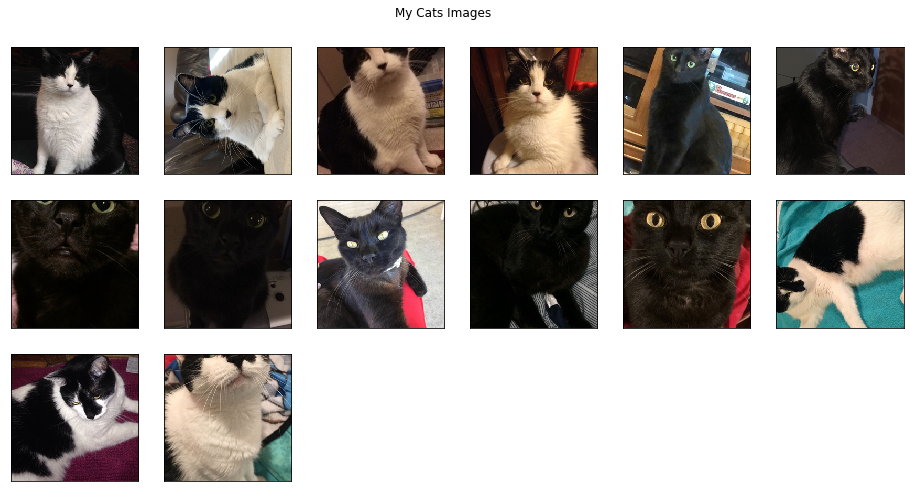

In [164]:
# plot samples of original images
my_images = resize_images_bigger(my_cats_file)[0]

fig = plt.figure(figsize=(16, 8)) 

for i in range(len(my_images)): 
    ax = fig.add_subplot(3, 6, i+1, xticks=[], yticks=[]) 
    img = Image.fromarray(my_images[i].reshape(244,244,3), 'RGB') 
    ax.imshow(img, interpolation='nearest') 
    
plt.suptitle('My Cats Images', y=0.95)

plt.show()

In [172]:
# load sample images of my cats
my_img_data = ImageDataGenerator(rescale=1./255)
my_cats_imgs = my_img_data.flow_from_directory('my_cats', 
                                               target_size=(244,244), 
                                               classes=None)

# predict cat breeds using trained Inception model
predictions = model_2.predict(my_cats_imgs)

file_list = []
predicted_labels = []
predicted_breeds = []

for file, i in enumerate(my_cats_imgs.filenames):
    j = predictions[file]
    k = list(j).index(max(j)) 
    file_list.append(i)
    predicted_labels.append(k)
    predicted_breeds.append(final_file[k][9:])

# display prediction results
prediction_df = pd.DataFrame({'Cat Img': file_list, 
                              'Predicted Label': predicted_labels,
                              'Predicted Breed': predicted_breeds})
prediction_df

Found 14 images belonging to 4 classes.


,Cat Img,Predicted Label,Predicted Breed
0,critter/critter_1.JPG,10,Torbie
1,critter/critter_2.JPG,1,Tortoiseshell
2,critter/critter_3.JPG,1,Tortoiseshell
3,critter/critter_4.JPG,1,Tortoiseshell
4,ganondorf/ganondorf_1.JPG,1,Tortoiseshell
5,ganondorf/ganondorf_2.JPG,5,Ragdoll
6,ganondorf/ganondorf_3.JPG,19,Tabby
7,ganondorf/ganondorf_4.JPG,15,Russian Blue
8,link/link_1.JPG,1,Tortoiseshell
9,link/link_2.JPG,1,Tortoiseshell
